# ES654 Machine Learning Prerequsite test

- Mihir Chauhan
- 19110079

**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

Ans.

We are given two matrices of (n, k) and (k, m).
When we multiple two multiplication by simple multiplication method, we can find the total number of opertions of multiplication and additions. 

Final answer of matrix size is (n, m), so each entry of matrix is derieved by  two k- vectors. each entry can be calculated by k multiplications and k - 1 additions. So, total number of operations are = n * m ( k + k - 1).





**2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

Ans. 



In [14]:
# python code to multiply two matrices of size (n, k) and (k, m)

def multiple(A, B):
    n = len(A)
    m = len(B[0])
    k = len(B)

    result = [[0 for i in range(m)] for j in range(n)]
    
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += A[i][l] * B[l][j]
    #print(result) 

A = np.random.rand(500,50)
 
B = arr = np.random.rand(50,500)

multiple(A,B)


In [15]:
import numpy as np
def np_dot(A,B):
    return np.dot(A,B)
np_dot(A,B)

array([[14.85986743, 14.30076571, 14.72617531, ..., 13.44191601,
        13.37125944, 14.23205718],
       [12.63890012, 15.04762798, 13.98947247, ..., 12.1592263 ,
        14.24117862, 13.75499818],
       [12.25855925, 12.27830501, 13.43086796, ..., 11.84700749,
        13.16067122, 12.37398744],
       ...,
       [12.83336379, 13.41968712, 13.82699776, ..., 12.66628976,
        12.90234541, 12.97459809],
       [11.14504189, 12.53918349, 12.89362518, ..., 12.76391046,
        12.15259156, 11.23498834],
       [13.53117393, 14.59086469, 14.4698467 , ..., 12.50307958,
        14.09078638, 12.8229827 ]])

In [17]:
#compare
import time

timings = []
for i in range(10): 
    t1 = time.time()
    multiple(A, B)
    t2 = time.time()
    timings.append(t2 - t1)
print(timings)


[10.494568824768066, 10.520912408828735, 8.715257167816162, 12.207541942596436, 12.433547973632812, 10.317838668823242, 9.756861448287964, 10.432981252670288, 13.441723108291626, 9.456186771392822]


In [20]:
print(np.mean(timings))
print(np.std(timings))

10.777741956710816
1.3929065001862735


In [18]:
import time

array_timings_np = []
for i in range(10): 
    t1 = time.time()
    np_dot(A, B)
    t2 = time.time()
    array_timings_np.append(t2 - t1)
print(array_timings_np)

[0.011359214782714844, 0.002362966537475586, 0.002187490463256836, 0.0017559528350830078, 0.0011451244354248047, 0.0011491775512695312, 0.0011410713195800781, 0.0011603832244873047, 0.0011458396911621094, 0.0011188983917236328]


In [21]:
print(np.mean(array_timings_np))
print(np.std(array_timings_np))

0.0024526119232177734
0.0030029341979751303


- as we can clearly see np dot multiple method is way faster than the regular normal multiple method. 

**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Ans. 

Time complixity of suggested method will be O(N^2), because we require the N/2 passes of the array for finding the median of the array. 

We can direct use the sorting algorithm and then find the medien by the index according to the length of the given array. Time complexity will be O(NlogN). 


In [22]:
# given method
def find_median(lst):
    if(len(lst) == 1):
        return lst[0]

    elif(len(lst) == 2):
        return (lst[0] + lst[1]) / 2.0

    if(len(lst) % 2 == 0):
        l = int((len(lst) / 2) + 1)
        #print(l)
        
        pre_max = 1000000000
        for i in range(1, l):
            
            max_so_far = -10000000
            for j in range(len(lst)):
                if(lst[j] > max_so_far and lst[j] < pre_max):
                    max_so_far = lst[j]
            pre_max = max_so_far
        pre_max = max_so_far
        max_so_far = -100000000
        for j in range(len(lst)):
            if(lst[j] > max_so_far and lst[j] < pre_max):
                    max_so_far = lst[j]

        return (max_so_far + pre_max) / 2.0

    else:
        l = int((len(lst) / 2))
        #print(l)
        
        pre_max = 1000000000
        for i in range(1, l+2):
            
            max_so_far = -10000000
            for j in range(len(lst)):
                if(lst[j] > max_so_far and lst[j] < pre_max):
                    max_so_far = lst[j]
            pre_max = max_so_far

        return max_so_far

find_median([5,6,7,3,2,1])
# above algorithm only works with distict numbers.
# to make it work with all the numbers we have make some changes in the algorithm 
# kind of like a selection sort problem
#  or can think like to find the kth largest element, can use heap or other datastructure to simplify. 

4.0

In [28]:
array = [5,6,7,3,2,2]
def find_midian_sort(array):
    array = sorted(array)
    if(len(array) % 2 == 0):
        return ((array[int(len(array) /2) - 1] + array[int(len(array) / 2)]) / 2.0)
    else:
        return (array[int(len(array) / 2)])


In [29]:
def find_median_np(array):
    return np.median(array)

In [33]:
#compare
import time
array_big = np.random.rand(10000)
array_timings_1 = []
for i in range(10): 
    t1 = time.time()
    find_median(array_big)
    t2 = time.time()
    array_timings_1.append(t2 - t1)
print(array_timings_1)
print(np.mean(array_timings_1))
print(np.std(array_timings_1))

[9.225269794464111, 11.541891813278198, 12.090005159378052, 11.599814414978027, 11.122074127197266, 13.113388776779175, 10.315648317337036, 9.374499320983887, 9.395183801651001, 9.605323314666748]
10.73830988407135
1.2813605049464494


In [34]:
array_timings_sort = []
for i in range(10): 
    t1 = time.time()
    find_midian_sort(array_big)
    t2 = time.time()
    array_timings_sort.append(t2 - t1)
print(array_timings_sort)
print(np.mean(array_timings_sort))
print(np.std(array_timings_sort))

[0.00723576545715332, 0.005772829055786133, 0.005491018295288086, 0.008463621139526367, 0.005677938461303711, 0.0054242610931396484, 0.004376411437988281, 0.003881216049194336, 0.003800630569458008, 0.005107879638671875]
0.005523157119750976
0.0013721155883148154


In [35]:
array_timings_np = []
for i in range(10): 
    t1 = time.time()
    find_median_np(array_big)
    t2 = time.time()
    array_timings_np.append(t2 - t1)
print(array_timings_np)
print(np.mean(array_timings_np))
print(np.std(array_timings_np))

[0.0018088817596435547, 0.0002460479736328125, 0.00021266937255859375, 0.00023317337036132812, 0.00022220611572265625, 0.0002048015594482422, 0.00020265579223632812, 0.0001976490020751953, 0.000225067138671875, 0.00019884109497070312]
0.0003751993179321289
0.00047813098198371185


- as we can see sort method is faster than the regular method and for large inputs np method is also very fast than sort method. 

**4. What is the gradient of the following function with respect to x and y?**

Given function,  
>  $f(x,y ) = x^2 y  + y^3 sin(x)$

Gradient of the above funciton is derieved as below,

> $ \frac{\partial f(x,y) }{ \partial x } = 2xy + y ^ 3 cos(x)$ 

> $ \frac{\partial f(x,y) }{ \partial y } = x^2 + 3y ^ 2 sin(x)$

So, Gradiant of $f(x,y)$ is $[2xy + y ^ 3 cos(x), x^2 + 3y ^ 2 sin(x) ]$ 


**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

Ans. 


In [66]:
import jax.numpy as jnp
import math
from jax import grad

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

dfdx = grad(f, argnums=0)
dfdy = grad(f, argnums=1)

**6. Use sympy to confirm that you obtain the same gradient analytically**.

In [65]:
import sympy

x, y = sympy.symbols('x y')
f = x**2 * y + y**3 * sympy.sin(x)

gradient_x = sympy.diff(f, x)
gradient_y = sympy.diff(f, y)

print(f"Gradient wrt x: {gradient_x}")
print(f"Gradient wrt y: {gradient_y}")

Gradient wrt x: 2*x*y + y**3*cos(x)
Gradient wrt y: x**2 + 3*y**2*sin(x)


**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:**

In [63]:
record_dict = {}

def add_year(year):
    if year in record_dict.keys():
        print("Year already exists.")
    else:
        record_dict[year] = {}
add_year(2022)
add_year(2023)
add_year(2024)
add_year(2025)

def add_Branch(branch,year):
    if year not in record_dict.keys():
        print("Year does not exist.")
    elif branch in record_dict[year].keys():
        print("Branch already exists.")
    else:
        record_dict[year][branch] = {}

add_Branch("Branch1",2022)
add_Branch("Branch2",2022)

def add_student(roll_number,name, branch, year):
    if year not in record_dict.keys():
        print("Year does not exist.")
    elif branch not in record_dict[year].keys():
        print("Branch does not exist.")
    elif roll_number in record_dict[year][branch].keys():
        print("Student already exists")
    else:
        record_dict[year][branch][roll_number] = {"roll_number" : roll_number, "Name":name, "Marks":{}}

add_student(1,"N", "Branch1", 2022)
add_student(2,"M", "Branch1", 2022)

def add_marks(roll_number, subject, marks, branch, year):
    if year not in record_dict.keys():
        print("Year does not exist.")
    elif branch not in record_dict[year].keys():
        print("Branch does not exist.")
    elif roll_number not in record_dict[year][branch].keys():
        print("Student does not exists")
    else:
        record_dict[year][branch][roll_number]["Marks"][subject] = marks
add_marks(1,"Maths", 100, "Branch1", 2022)
add_marks(1,"English", 70, "Branch1", 2022)



In [64]:
record_dict

{2022: {'Branch1': {1: {'roll_number': 1,
    'Name': 'N',
    'Marks': {'Maths': 100, 'English': 70}},
   2: {'roll_number': 2, 'Name': 'M', 'Marks': {}}},
  'Branch2': {}},
 2023: {},
 2024: {},
 2025: {}}

**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

Ans.

In [62]:
class record:

    def __init__(self):
        self.dect = {}

    def add_year(self,year):
        if year in self.dect.keys():
            print("Year already exists.")
        else:
            self.dect[year]= {}
    
    def view(self):
        print(self.dect)

    def add_Branch(self, branch,year):
        if year not in self.dect.keys():
            print(year, "does not exist.")
        elif branch in self.dect[year].keys():
            print("Branch already exists.")
        else:
            self.dect[year][branch] = {}

    def add_student(self,roll_number,name, branch, year):
        if year not in self.dect.keys():
            print("Year does not exist.")
        elif branch not in self.dect[year].keys():
            print(branch, "does not exist.")
        elif roll_number in self.dect[year][branch].keys():
            print("Student already exists")
        else:
            self.dect[year][branch][roll_number] = {"roll_number" : roll_number, "Name":name, "Marks":{}}

    def add_marks(self, roll_number, subject, marks, branch, year):
        if year not in self.dect.keys():
            print("Year does not exist.")
        elif branch not in self.dect[year].keys():
            print("Branch does not exist.")
        elif roll_number not in self.dect[year][branch].keys():
            print("Student does not exists")
        else:
            self.dect[year][branch][roll_number]["Marks"][subject] = marks

record1 = record()
record1.add_year(2022) 
record1.add_year(2023) 

record1.add_Branch("Branch1",2022)
record1.add_Branch("Branch2",2022)

record1.add_Branch("Branch1",2023)

record1.add_student(1,"N", "Branch1", 2022)
#record1.add_student(2,"M", "Branch3", 2022)

record1.add_marks(1,"Maths", 100, "Branch1", 2022)
record1.add_marks(1,"English", 70, "Branch1", 2022)

record1.view()


{2022: {'Branch1': {1: {'roll_number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch2': {}}, 2023: {'Branch1': {}}}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

1. $y = x$

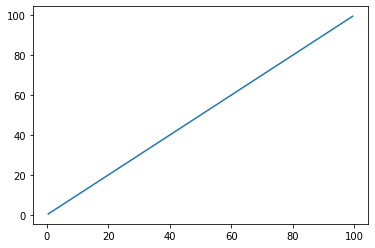

In [55]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return x

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

2. $y = x ^ 2$

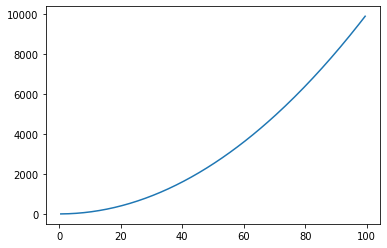

In [56]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return x * x

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

3. $y = x ^ 3 / 100$

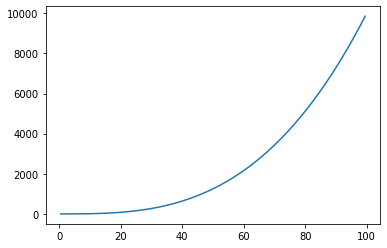

In [57]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return (x*x*x) / 100

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

4. $y = sin(x)$

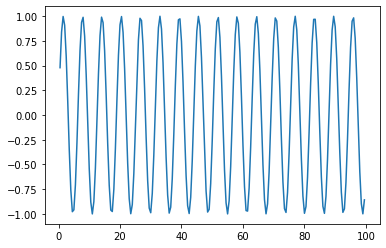

In [58]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return np.sin(x)

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

5. $y = \frac{sin(x) }{x}$

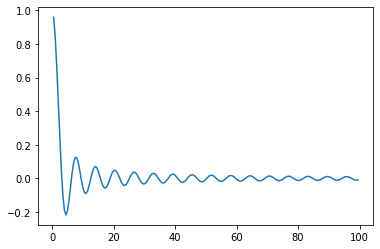

In [59]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return np.sin(x) / x

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

6. $ y = log(x) $

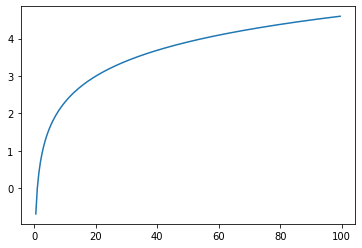

In [60]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return np.log(x)

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

7. $y = e ^ x$



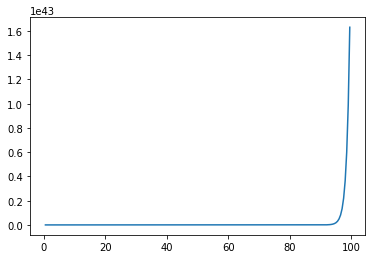

In [61]:
from matplotlib import pyplot as plt
import numpy as np

def f(x):
    return np.exp(x)

x = np.arange(0.5, 100, 0.5)
plt.plot(x, f(x))
plt.show()

**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

Ans. 



In [47]:
# Creating a dataframe with random numbers in (1, 2).

import numpy as np
import pandas as pd

arr = np.random.rand(20,5)

for i in range(len(arr)):
    for  j in range(5):
        arr[i][j] +=1
    
df = pd.DataFrame(arr)
df.columns = ['a','b','c','d','e']

In [48]:
df

,a,b,c,d,e
0,1.040372,1.847941,1.434518,1.861571,1.568230
1,1.588267,1.273883,1.621005,1.787259,1.539226
2,1.050595,1.556726,1.819399,1.282998,1.509954
3,1.141648,1.309419,1.094297,1.674216,1.040544
4,1.804503,1.188201,1.049098,1.439202,1.688790
5,1.916768,1.614412,1.076417,1.536329,1.912533
6,1.245269,1.942704,1.377476,1.404984,1.392634
7,1.615483,1.024815,1.502427,1.302323,1.716871
8,1.189719,1.811711,1.221707,1.318665,1.626896
9,1.517929,1.338719,1.896539,1.587223,1.769024


In [49]:
# Largest standard deviation in column,

ar = ['b','c','d','e']
com = 'a'
s = np.std(df['a'])
#print(s)

for i in ar:
    #print(np.std(df[i]))
    if(np.std(df[i]) > s):
        com = i
        #print(com)
        s = np.std(df[i])
print("largest standard deviation in: ", com)

largest standard deviation in:  c


In [50]:
# Lowest mean in row,

mean = np.mean(df.iloc[0])
low = 0
for i in range(1,20):
    if(np.mean(df.iloc[i]) < mean):
        low = i
        mean = np.mean(df.iloc[i])
print("lowest mean in a row: ", low)

lowest mean in a row:  3


**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

Ans.

In [51]:
sum = []
c8 = []
for i in range(0,20):
    sum.append(df.iloc[i].sum())
    if(df.iloc[i].sum() < 8 ):
        c8.append('LT8')
    else:
        c8.append('GT8')
#print(sum)
df['f'] = sum
df['g'] = c8

In [52]:
df

,a,b,c,d,e,f,g
0,1.040372,1.847941,1.434518,1.861571,1.568230,7.752632,LT8
1,1.588267,1.273883,1.621005,1.787259,1.539226,7.809640,LT8
2,1.050595,1.556726,1.819399,1.282998,1.509954,7.219672,LT8
3,1.141648,1.309419,1.094297,1.674216,1.040544,6.260125,LT8
4,1.804503,1.188201,1.049098,1.439202,1.688790,7.169795,LT8
5,1.916768,1.614412,1.076417,1.536329,1.912533,8.056458,GT8
6,1.245269,1.942704,1.377476,1.404984,1.392634,7.363066,LT8
7,1.615483,1.024815,1.502427,1.302323,1.716871,7.161920,LT8
8,1.189719,1.811711,1.221707,1.318665,1.626896,7.168698,LT8
9,1.517929,1.338719,1.896539,1.587223,1.769024,8.109434,GT8


- Standard Deviation in column f with respect to "GT8" and "LT8" in column g. 

In [53]:
df[df["g"] == "GT8"]["f"].std()

0.19440150716948315

In [54]:
df[df["g"] == "LT8"]["f"].std()

0.5409988715587406

**12. Write a small piece of code to explain broadcasting in numpy.**



Ans. 

Broadcasting is how numpy treats array with different shapes during arithmetic operations to make them have compatible shapes of two arrays. Numpy do Boradcasting with some constraints, the smaller array is boradcast across the larger array. Broacasting follows specific set of rules. Simple example of Broadcasting is given as, 



In [37]:
A = np.array([1,2,3])
B = np.array([2,4,5])
A * B

array([ 2,  8, 15])

In [39]:
C = np.array([3,4,5])
D = np.array([3])
C * D

array([ 9, 12, 15])

**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [36]:
import numpy as np
def find_argmin(arr):
    if(len(arr) == 0 ):
        print("Empty array")
    min = 10000000000000
    index = -1
    for i in range(len(arr)):
        if(arr[i] < min):
            min = arr[i]
            index = i
    return (min,index)

arr = np.array([6,8,4,5,6])

print(find_argmin(arr))
print(arr.argmin())


(4, 2)
2
